In [13]:
u = np.random.uniform(3, 10, 1)
u

array([5.5543001])

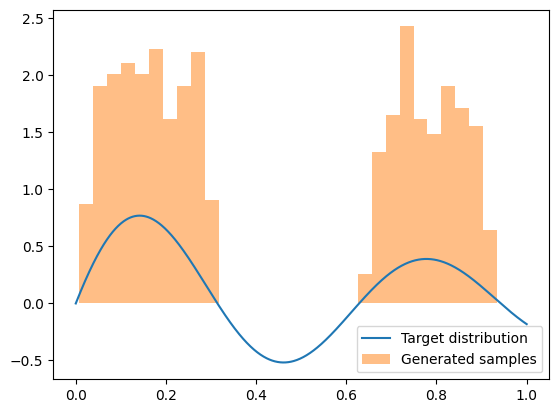

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution
def target_dist(x):
    return np.sin(10*x) / (2*x + 1)

# Define the proposal distribution (simple uniform distribution)
def proposal_dist(a, b, n):
    return np.random.uniform(a, b, n)

# Set the bounds for the proposal distribution and the maximum value of the target distribution
a = 0
b = 1
M = 0.5

# Set the number of samples to generate
n_samples = 1000

# Generate the samples using rejection sampling
samples = []
while len(samples) < n_samples:
    # Draw a sample from the proposal distribution
    x = proposal_dist(a, b, 1)[0]
    
    # Draw a uniform random variable to determine acceptance/rejection
    u = np.random.uniform(0, M, 1)[0]
    
    # Evaluate the target distribution at x
    fx = target_dist(x)
    
    # Accept the sample if u <= fx/M
    if u <= fx/M:
        samples.append(x)

# Plot the target distribution and the generated samples
x_vals = np.linspace(a, b, 1000)
y_vals = target_dist(x_vals)
plt.plot(x_vals, y_vals, label='Target distribution')
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated samples')
plt.legend()
plt.show()


/tmp/ipykernel_121053/1297057230.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot([x[0] for x in accepted], [x[1] for x in accepted] , 'ro', color='g') # Plot Accepted Points
/tmp/ipykernel_121053/1297057230.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot([x[0] for x in rejected], [x[1] for x in rejected] , 'ro', color='r') # Plot Rejected Points


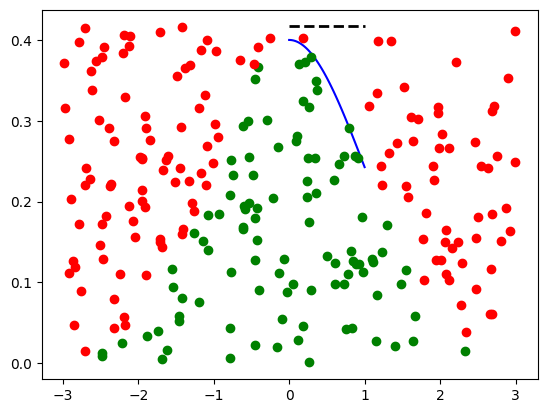

Expected Mean =  0 0.40002225892128485
Approximated Mean =  -0.060787234647559786 0.39928388251918884
Approximated Variance =  0.955141555090275


In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import truncnorm
 
#Domain of X
xdomain = [-3, 3]
 
def pdf(x):
    """
    Probability distribution function for Random Variable X
    from which we want to sample points. Here we assume
    we have truncated standard normal distribution in the domain of -3 to 3
    """
    return truncnorm.pdf(x, xdomain[0], xdomain[1])
 
def random_point_within_enveloping_region():
    """
    """
    x = random.uniform(xdomain[0], xdomain[1])
    y = random.uniform(0, 0.4167)
    return (x,y)
 
#Number of sample points to sample
n = 100
 
#Creating two arrays to capture accepted and rejected points
accepted = []
rejected = []
 
#Run this loop until we got required number of valid points
while len(accepted) < n:
 
    #Get random point
    x, y = random_point_within_enveloping_region()
 
    #If y is below blue curve then accept it
    if y < pdf(x):
       accepted.append((x, y))
    #otherwise reject it.
    else:
       rejected.append((x, y))
 
#Plot the graph
x = np.linspace(a, b, 100)
plt.plot(x, [pdf(i) for i in x], color='blue') # Plot Random Variable X
plt.plot(x, [0.4167 for i in x], color='black', ls='dashed', lw=2) # Plot Enveloping Region
plt.plot([x[0] for x in accepted], [x[1] for x in accepted] , 'ro', color='g') # Plot Accepted Points
plt.plot([x[0] for x in rejected], [x[1] for x in rejected] , 'ro', color='r') # Plot Rejected Points
plt.show()
 
#Calculate expected value for the truncated standard normal distribution
approxMean = sum([x[0] for x in accepted])/len(accepted)
print("Expected Mean = ", 0, pdf(0))
print("Approximated Mean = ", approxMean, pdf(approxMean))
print("Approximated Variance = ", sum([(x[0] - approxMean)**2 for x in accepted])/(len(accepted)-1))